In [3]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

In [16]:
import matplotlib.pyplot as plt

In [4]:
inputs = ['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10', 'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14', 'EXG Channel 15']
outputs = ['nose y', 'nose x', 'left eye y', 'left eye x', 'right eye y', 'right eye x', 'left ear y', 'left ear x', 'right ear y', 'right ear x', 'left shoulder y', 'left shoulder x', 'right shoulder y', 'right shoulder x', 'left elbow y', 'left elbow x', 'right elbow y', 'right elbow x', 'left wrist y', 'left wrist x', 'right wrist y', 'right wrist x', 'left hip y', 'left hip x', 'right hip y', 'right hip x', 'left knee y', 'left knee x', 'right knee y', 'right knee x', 'left ankle y', 'left ankle x', 'right ankle y', 'right ankle x']

In [6]:
#Load the training data into a dataframe
training_dataset = pd.read_csv('../prepared_data/Training_Data_synthetic.csv') 
training_keypoints = training_dataset.copy()
training_labels = np.array(training_keypoints[outputs])
training_eeg = np.array(training_keypoints[inputs])

In [9]:
training_dataset.head()

,nose y,nose x,nose c,left eye y,left eye x,left eye c,right eye y,right eye x,right eye c,left ear y,...,EXG Channel 6,EXG Channel 7,EXG Channel 8,EXG Channel 9,EXG Channel 10,EXG Channel 11,EXG Channel 12,EXG Channel 13,EXG Channel 14,EXG Channel 15
0,0.184159,0.509971,0.011455,0.148159,0.567829,0.009986,0.164116,0.548859,0.017831,0.102838,...,41.996988,-132.858158,77.864949,-14.744279,-57.041168,-53.770537,-37.420275,-51.738719,33.124594,-74.722500
1,0.184159,0.509971,0.011455,0.148159,0.567829,0.009986,0.164116,0.548859,0.017831,0.102838,...,-28.828246,-64.418623,64.753902,-18.535593,-60.881877,-87.289420,-24.009047,-91.002046,29.745448,-33.248701
2,0.184159,0.509971,0.011455,0.148159,0.567829,0.009986,0.164116,0.548859,0.017831,0.102838,...,-98.293650,33.916804,-16.672206,-26.084640,-74.956990,-82.361904,-24.567369,-111.580291,-9.961168,16.216094
3,0.200854,0.510157,0.011543,0.163591,0.566250,0.010709,0.188705,0.485532,0.011435,0.102403,...,-55.649411,-53.832882,10.879658,17.166846,155.629848,-31.591964,23.240537,-85.198344,4.839110,79.509034
4,0.200854,0.510157,0.011543,0.163591,0.566250,0.010709,0.188705,0.485532,0.011435,0.102403,...,20.206357,-54.276958,-15.435135,36.097077,106.523375,-30.153652,-20.745524,-29.518766,-13.001953,98.014149


In [11]:
#Same thing for the validation data
validation_dataset = pd.read_csv('../prepared_data/Validation_Data_synthetic.csv')
validation_keypoints = validation_dataset.copy()
validation_labels = np.array(validation_keypoints[outputs])
validation_eeg = np.array(validation_keypoints[inputs])

In [12]:
validation_dataset.head()

,nose y,nose x,nose c,left eye y,left eye x,left eye c,right eye y,right eye x,right eye c,left ear y,...,EXG Channel 6,EXG Channel 7,EXG Channel 8,EXG Channel 9,EXG Channel 10,EXG Channel 11,EXG Channel 12,EXG Channel 13,EXG Channel 14,EXG Channel 15
0,0.190292,0.495692,0.011085,0.152688,0.553690,0.013430,0.160685,0.473385,0.007156,0.113705,...,48.259568,76.176321,-19.768388,38.620591,151.831805,73.326234,-43.851929,-99.077991,-117.563662,-87.345392
1,0.193488,0.496042,0.011872,0.155567,0.551650,0.012886,0.164042,0.472869,0.007379,0.096479,...,86.327684,-0.866498,-49.613286,51.500750,111.007330,-0.718442,-78.750702,-67.755598,-77.135310,-96.185578
2,0.193488,0.496042,0.011872,0.155567,0.551650,0.012886,0.164042,0.472869,0.007379,0.096479,...,56.405833,-76.898381,-13.153222,48.059778,23.406024,-41.320007,-54.854184,-7.559504,-42.773574,-93.087491
3,0.193488,0.496042,0.011872,0.155567,0.551650,0.012886,0.164042,0.472869,0.007379,0.096479,...,-19.224192,-83.330003,53.579937,30.576102,-37.118100,-40.397909,-7.199280,39.172173,-34.841325,-67.315619
4,0.174173,0.499506,0.012674,0.136782,0.556734,0.012413,0.160151,0.474585,0.008143,0.094631,...,-37.004743,91.986273,-24.297039,-36.396344,14.599003,47.612819,0.469508,-17.408490,-2.908656,122.015791


In [19]:
#Set the model
pose_model = tf.keras.Sequential([
    layers.Dense(16), layers.Dense(26), layers.Dense(26), layers.Dense(34)
    ])
pose_model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])


In [28]:
#Train the model
history = pose_model.fit(training_eeg, training_labels, epochs=1000, validation_data=(validation_eeg, validation_labels))

Epoch 1/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0376 - accuracy: 0.4960 - val_loss: 0.0345 - val_accuracy: 0.4589
Epoch 2/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0366 - accuracy: 0.5185 - val_loss: 0.0334 - val_accuracy: 0.4444
Epoch 3/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0357 - accuracy: 0.5121 - val_loss: 0.0334 - val_accuracy: 0.4879
Epoch 4/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0344 - accuracy: 0.5314 - val_loss: 0.0314 - val_accuracy: 0.4686
Epoch 5/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 0.5298 - val_loss: 0.0302 - val_accuracy: 0.4928
Epoch 6/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0319 - accuracy: 0.5411 - val_loss: 0.0294 - val_accuracy: 0.4831
Epoch 7/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.0310 - accuracy: 0.5636 - val_loss: 0.0284 - val_accuracy: 0.5072
Epoch

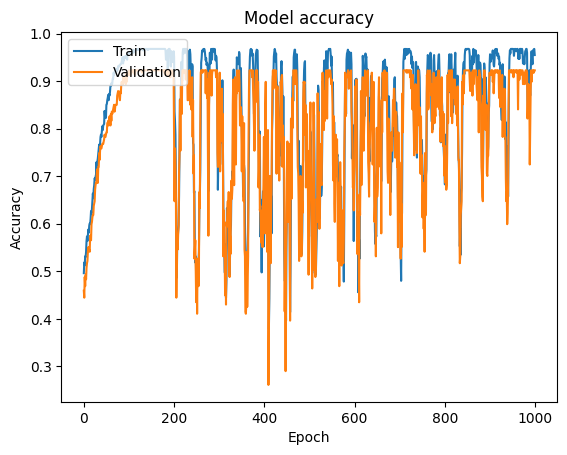

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

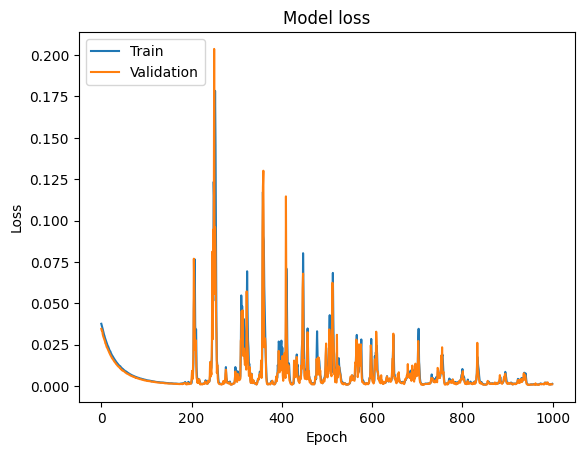

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
#Load test data
test_dataset = pd.read_csv('../prepared_data/Test_Data_synthetic.csv')
test_keypoints = test_dataset.copy()
test_labels = np.array(test_keypoints[outputs])
test_eeg = np.array(test_keypoints[inputs])

In [1]:
#Test the model with the test data
results = pose_model.evaluate(test_eeg, test_labels)
print('test loss & acc:', results)

NameError: name 'pose_model' is not defined